In [1]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Breast Cancer Prediction.csv')

In [3]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [5]:
cd = df[['Clump Thickness','Marginal Adhesion','Single Epithelial Cell Size','Class']]
cd.head()

,Clump Thickness,Marginal Adhesion,Single Epithelial Cell Size,Class
0,5,1,2,2
1,5,5,7,2
2,3,1,2,2
3,6,1,3,2
4,4,3,2,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000245276A2B88>,
      dtype=object)

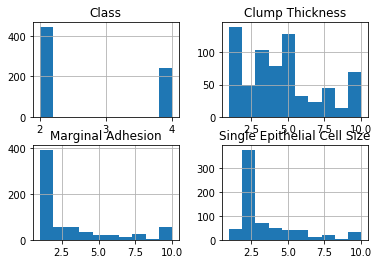

In [7]:
cd.hist()

In [8]:
X = cd.iloc[:, :-1].values
y = cd.iloc[:, 1].values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size = 0.8, random_state=0)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [13]:
y_pred = knn.predict(X_test)
y_pred

array([ 1,  1,  1,  3,  1,  1,  2, 10,  3,  1, 10,  1, 10,  1,  5,  3,  5,
        1,  8,  1,  1,  2,  1,  1,  4,  5,  1,  1,  1,  3,  1, 10, 10,  1,
        1,  1,  5,  5,  1,  6,  1,  1,  1,  1,  1,  1,  1,  8,  3,  1,  3,
        1,  1,  2,  1,  2, 10,  5,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       10,  1,  1,  1,  1,  1,  1,  1,  7,  1,  1,  1, 10,  3, 10,  1,  1,
       10,  1,  3, 10,  1,  6,  1,  1,  1,  4,  3,  4,  1,  4,  1,  1,  2,
        2,  3,  1,  3,  8,  1,  1,  1,  7,  3,  1,  7,  1,  1,  1, 10,  1,
        1,  1,  6,  1,  1, 10, 10,  1,  1,  1,  8,  1,  1,  3,  1,  1,  6,
        1], dtype=int64)

In [14]:
for i in y_pred:
    if i==2:
        print(i, "Benign")
    else:
        print(i, 'Malignant')

1 Malignant
1 Malignant
1 Malignant
3 Malignant
1 Malignant
1 Malignant
2 Benign
10 Malignant
3 Malignant
1 Malignant
10 Malignant
1 Malignant
10 Malignant
1 Malignant
5 Malignant
3 Malignant
5 Malignant
1 Malignant
8 Malignant
1 Malignant
1 Malignant
2 Benign
1 Malignant
1 Malignant
4 Malignant
5 Malignant
1 Malignant
1 Malignant
1 Malignant
3 Malignant
1 Malignant
10 Malignant
10 Malignant
1 Malignant
1 Malignant
1 Malignant
5 Malignant
5 Malignant
1 Malignant
6 Malignant
1 Malignant
1 Malignant
1 Malignant
1 Malignant
1 Malignant
1 Malignant
1 Malignant
8 Malignant
3 Malignant
1 Malignant
3 Malignant
1 Malignant
1 Malignant
2 Benign
1 Malignant
2 Benign
10 Malignant
5 Malignant
2 Benign
1 Malignant
1 Malignant
1 Malignant
1 Malignant
1 Malignant
1 Malignant
1 Malignant
1 Malignant
1 Malignant
10 Malignant
1 Malignant
1 Malignant
1 Malignant
1 Malignant
1 Malignant
1 Malignant
1 Malignant
7 Malignant
1 Malignant
1 Malignant
1 Malignant
10 Malignant
3 Malignant
10 Malignant
1 Malignan

In [16]:
print("Accuracy", knn.score(X_test, y_test))

Accuracy 0.8832116788321168
